<a href="https://colab.research.google.com/github/Sahronn/SahronAngelinaIhalauwF55121030TubesDataMining/blob/main/TUBES_DATA_MINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUGAS BESAR MK DATA MINING**
**KELOMPOK I**

*   Indah Rizki Rahmawati (F55121004)
*   Sahron Angelina Ihalauw (F55121030)







Tugas ini merupakan tugas besar untuk matakuliah Data Mining.:

Semester 6

Prodi Teknik Informatika

Universitas Tadulako

# **A. Regression & Clustering**

**1. Crawling/Sracping Data dari sumber data berikut [Data Perkiraan Cuaca Terbuka BMKG](https://data.bmkg.go.id/prakiraan-cuaca/)**

Memilih cuaca terekstream



In [36]:
# Unggah file XML
from google.colab import files
uploaded = files.upload()

Saving DigitalForecast-KalimantanTengah.xml to DigitalForecast-KalimantanTengah.xml


In [37]:
import xml.etree.ElementTree as ET

# Memuat file XML
tree = ET.parse('DigitalForecast-KalimantanTengah.xml')
root = tree.getroot()

# Debugging: Cetak struktur XML
def print_element(element, level=0):
    indent = "  " * level
    print(f"{indent}{element.tag} {element.attrib}")
    for subelement in element:
        print_element(subelement, level + 1)

print_element(root)

data {'source': 'meteofactory', 'productioncenter': 'NC Jakarta'}
  forecast {'domain': 'local'}
    issue {}
      timestamp {}
      year {}
      month {}
      day {}
      hour {}
      minute {}
      second {}
    area {'id': '501335', 'latitude': '-1.666666668', 'longitude': '114.9667', 'coordinate': '114.9667 -1.666666668', 'type': 'land', 'region': '', 'level': '1', 'description': 'Buntok', 'domain': 'Kalimantan Tengah', 'tags': ''}
      name {'{http://www.w3.org/XML/1998/namespace}lang': 'en_US'}
      name {'{http://www.w3.org/XML/1998/namespace}lang': 'id_ID'}
      parameter {'id': 'hu', 'description': 'Humidity', 'type': 'hourly'}
        timerange {'type': 'hourly', 'h': '0', 'datetime': '202406230000'}
          value {'unit': '%'}
        timerange {'type': 'hourly', 'h': '6', 'datetime': '202406230600'}
          value {'unit': '%'}
        timerange {'type': 'hourly', 'h': '12', 'datetime': '202406231200'}
          value {'unit': '%'}
        timerange {'type': 'h

In [38]:
import pandas as pd

# Inisialisasi list kosong untuk menyimpan data
data = []

# Mengiterasi elemen 'area' dan menyimpan data ke dalam list
for area in root.findall('.//area'):
    area_id = area.get('id')
    area_latitude = area.get('latitude')
    area_longitude = area.get('longitude')
    area_description = area.get('description')
    area_domain = area.get('domain')

    for parameter in area.findall('parameter'):
        parameter_id = parameter.get('id')
        parameter_description = parameter.get('description')
        parameter_type = parameter.get('type')

        for timerange in parameter.findall('timerange'):
            timerange_type = timerange.get('type')
            timerange_h = timerange.get('h')
            timerange_day = timerange.get('day')
            timerange_datetime = timerange.get('datetime')

            for value in timerange.findall('value'):
                value_unit = value.get('unit')
                value_text = value.text

                data.append({
                    'area_id': area_id,
                    'area_latitude': area_latitude,
                    'area_longitude': area_longitude,
                    'area_description': area_description,
                    'area_domain': area_domain,
                    'parameter_id': parameter_id,
                    'parameter_description': parameter_description,
                    'parameter_type': parameter_type,
                    'timerange_type': timerange_type,
                    'timerange_h': timerange_h,
                    'timerange_day': timerange_day,
                    'timerange_datetime': timerange_datetime,
                    'value_unit': value_unit,
                    'value_text': value_text
                })

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Tampilkan DataFrame
df.head()


,area_id,area_latitude,area_longitude,area_description,area_domain,parameter_id,parameter_description,parameter_type,timerange_type,timerange_h,timerange_day,timerange_datetime,value_unit,value_text
0,501335,-1.666666668,114.9667,Buntok,Kalimantan Tengah,hu,Humidity,hourly,hourly,0,None,202406230000,%,85
1,501335,-1.666666668,114.9667,Buntok,Kalimantan Tengah,hu,Humidity,hourly,hourly,6,None,202406230600,%,60
2,501335,-1.666666668,114.9667,Buntok,Kalimantan Tengah,hu,Humidity,hourly,hourly,12,None,202406231200,%,90
3,501335,-1.666666668,114.9667,Buntok,Kalimantan Tengah,hu,Humidity,hourly,hourly,18,None,202406231800,%,100
4,501335,-1.666666668,114.9667,Buntok,Kalimantan Tengah,hu,Humidity,hourly,hourly,24,None,202406240000,%,85


In [39]:
# Inisialisasi dictionary untuk menyimpan DataFrame terpisah berdasarkan parameter
parameter_dfs = {}

# Mengiterasi setiap parameter unik dan memisahkan data
for parameter_id in df['parameter_id'].unique():
    parameter_df = df[df['parameter_id'] == parameter_id].copy()
    parameter_df = parameter_df[['area_id', 'area_description', 'timerange_datetime', 'value_text']].pivot_table(
        index=['area_id', 'area_description', 'timerange_datetime'],
        values='value_text',
        aggfunc='first'
    ).reset_index()
    parameter_dfs[parameter_id] = parameter_df

# Tampilkan DataFrame terpisah untuk parameter humidity sebagai contoh
humidity_df = parameter_dfs['hu']
humidity_df.head()

,area_id,area_description,timerange_datetime,value_text
0,501335,Buntok,202406230000,85
1,501335,Buntok,202406230600,60
2,501335,Buntok,202406231200,90
3,501335,Buntok,202406231800,100
4,501335,Buntok,202406240000,85


In [40]:
# Mulai dengan DataFrame untuk parameter pertama
combined_df = parameter_dfs[list(parameter_dfs.keys())[0]]

# Gabungkan dengan DataFrame parameter lainnya
for parameter_id in list(parameter_dfs.keys())[1:]:
    combined_df = pd.merge(combined_df, parameter_dfs[parameter_id],
                           on=['area_id', 'area_description', 'timerange_datetime'],
                           how='outer', suffixes=('', f'_{parameter_id}'))

# Tampilkan DataFrame yang telah digabungkan
combined_df.head()

,area_id,area_description,timerange_datetime,value_text,value_text_humax,value_text_tmax,value_text_humin,value_text_tmin,value_text_t,value_text_weather,value_text_wd,value_text_ws
0,501335,Buntok,202406230000,85,NaN,NaN,NaN,NaN,27,60,315,5
1,501335,Buntok,202406230600,60,NaN,NaN,NaN,NaN,33,3,135,5
2,501335,Buntok,202406231200,90,100,33,60,23,26,60,180,5
3,501335,Buntok,202406231800,100,NaN,NaN,NaN,NaN,23,3,0,0
4,501335,Buntok,202406240000,85,NaN,NaN,NaN,NaN,26,1,0,0


In [41]:
combined_df.to_csv('data_scraped.csv', index=False)

In [42]:
from google.colab import files

# Mengunduh file CSV
files.download('data_scraped.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**2. Proses EDA**

In [43]:
df.head()

,area_id,area_latitude,area_longitude,area_description,area_domain,parameter_id,parameter_description,parameter_type,timerange_type,timerange_h,timerange_day,timerange_datetime,value_unit,value_text
0,501335,-1.666666668,114.9667,Buntok,Kalimantan Tengah,hu,Humidity,hourly,hourly,0,None,202406230000,%,85
1,501335,-1.666666668,114.9667,Buntok,Kalimantan Tengah,hu,Humidity,hourly,hourly,6,None,202406230600,%,60
2,501335,-1.666666668,114.9667,Buntok,Kalimantan Tengah,hu,Humidity,hourly,hourly,12,None,202406231200,%,90
3,501335,-1.666666668,114.9667,Buntok,Kalimantan Tengah,hu,Humidity,hourly,hourly,18,None,202406231800,%,100
4,501335,-1.666666668,114.9667,Buntok,Kalimantan Tengah,hu,Humidity,hourly,hourly,24,None,202406240000,%,85


In [44]:
#Menampilkan ringkasan informasi tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   area_id                2100 non-null   object
 1   area_latitude          2100 non-null   object
 2   area_longitude         2100 non-null   object
 3   area_description       2100 non-null   object
 4   area_domain            2100 non-null   object
 5   parameter_id           2100 non-null   object
 6   parameter_description  2100 non-null   object
 7   parameter_type         2100 non-null   object
 8   timerange_type         2100 non-null   object
 9   timerange_h            1848 non-null   object
 10  timerange_day          252 non-null    object
 11  timerange_datetime     2100 non-null   object
 12  value_unit             2100 non-null   object
 13  value_text             2100 non-null   object
dtypes: object(14)
memory usage: 229.8+ KB


In [45]:
# Tampilkan statistik deskriptif
df.describe()

,area_id,area_latitude,area_longitude,area_description,area_domain,parameter_id,parameter_description,parameter_type,timerange_type,timerange_h,timerange_day,timerange_datetime,value_unit,value_text
count,2100,2100,2100,2100,2100,2100,2100,2100,2100,1848,252,2100,2100,2100
unique,14,14,14,14,1,9,9,2,2,12,3,12,11,59
top,501335,-1.666666668,114.9667,Buntok,Kalimantan Tengah,ws,Wind speed,hourly,hourly,0,20240623,202406231200,%,0
freq,150,150,150,150,2100,672,672,1848,1848,154,84,238,252,150


In [46]:
#menghitung jumlah baris yang duplikat dalam DataFrame
df.duplicated().sum()

0

In [47]:
# Mengecek missing values
df.isnull().sum()

area_id                     0
area_latitude               0
area_longitude              0
area_description            0
area_domain                 0
parameter_id                0
parameter_description       0
parameter_type              0
timerange_type              0
timerange_h               252
timerange_day            1848
timerange_datetime          0
value_unit                  0
value_text                  0
dtype: int64

In [48]:
#menghitung frekuensi masing-masing nilai unik dalam kolom value_text
df['value_text'].value_counts()

value_text
0             150
5.75389725    119
2.57222222    119
5             119
9.26          119
3             116
90            109
60             74
95             69
E              64
9000           64
26             50
78.8           50
75.2           46
24             46
135            42
13500          42
SE             42
85             42
65             40
77             36
25             36
87.8           34
31             34
VARIABLE       30
000            30
80.6           19
27             19
18.52          19
5.14444444     19
11.5077945     19
10             19
29             18
30             18
86             18
84.2           18
73.4           17
23             17
45             13
NE             13
4500           13
91.4           12
70             12
100            12
33             12
ENE             9
6730            9
67.5            9
NW              8
315             8
31500           8
75              6
80              2
1               2
18000           2

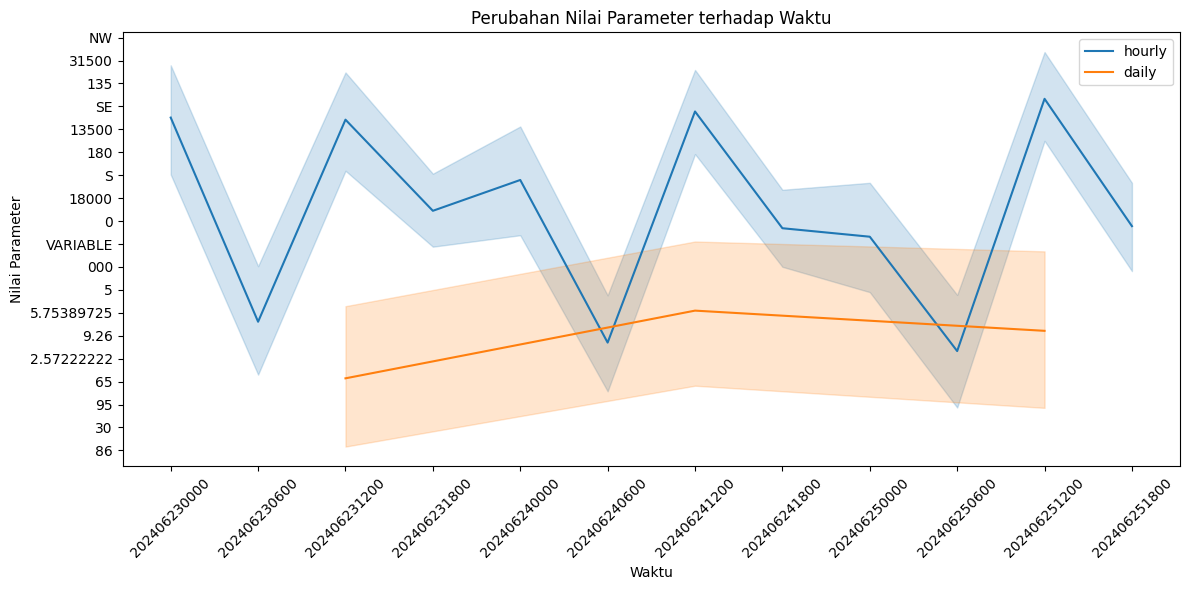

In [49]:
# Line plot untuk melihat perubahan nilai 'value_text' terhadap 'timerange_datetime'
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.lineplot(x='timerange_datetime', y='value_text', hue='parameter_type', data=df)
plt.title('Perubahan Nilai Parameter terhadap Waktu')
plt.xlabel('Waktu')
plt.ylabel('Nilai Parameter')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()

**3. Insight**

**Ringkasan Informasi DataFrame:**
*   DataFrame memiliki 2100 baris dan 14 kolom,
semua kolom memiliki tipe data object.
*   Terdapat kolom timerange_h yang memiliki 252 nilai null, dan kolom timerange_day yang memiliki 1848 nilai null.

**Statistik Deskriptif:**
Karena semua kolom memiliki tipe data object, perhitungan statistik deskriptif seperti mean, std, min, dan max tidak relevan dalam konteks ini. Ini menunjukkan perlu untuk mengonversi beberapa kolom menjadi tipe data numerik jika diperlukan untuk analisis lebih lanjut.

**Duplikasi Baris**
Tidak ada baris yang duplikat dalam DataFrame ini (df.duplicated().sum() = 0), yang menunjukkan data murni tanpa duplikasi.

**Missing Values:**
Kolom timerange_h memiliki 252 nilai null, sedangkan kolom timerange_day memiliki 1848 nilai null. Ini menunjukkan bahwa kolom timerange_day memiliki sebagian besar nilai kosong dan perlu dipertimbangkan bagaimana menangani nilai yang hilang ini.

**Frekuensi Nilai Unik dalam Kolom 'value_text':
Kolom value_text memiliki 74 nilai unik dengan frekuensi masing-masing nilai yang bervariasi dari 1 hingga 162. Nilai 0 adalah nilai yang paling sering muncul dengan frekuensi 162.

**Insight Yang Dapat Diambil:**
*   Data Quality: Perlu perhatian khusus terhadap kolom timerange_day yang memiliki banyak nilai null. Mungkin perlu dilakukan pengecekan lebih lanjut apakah kolom ini memang harus diisi atau ada strategi penggantian yang lebih baik.
*   Nilai Dominan: Nilai 0 dalam kolom value_text mendominasi, dengan kemungkinan besar mempengaruhi analisis statistik atau model yang akan dibangun nantinya.
*   Pemrosesan Lanjutan: Kemungkinan perlu untuk mengonversi kolom-kolom yang relevan menjadi tipe data numerik untuk memungkinkan analisis statistik lebih lanjut.
*   Kesimpulan: EDA awal menunjukkan bahwa data memiliki beberapa aspek yang perlu diperbaiki sebelum analisis lebih lanjut. Hal ini termasuk menangani nilai null, memastikan representasi yang tepat dari data (misalnya, mengubah tipe data jika diperlukan), dan memahami distribusi nilai dalam setiap kolom untuk mempersiapkan data untuk tahap analisis berikutnya.








**4. Prediksi temperatur/suhu rata-rata 30 hari setelahnya dari tanggal terakhir**

In [131]:
import pandas as pd
from datetime import datetime, timedelta

# Contoh data (gantilah dengan data yang sesuai)
data = {
    'timerange_datetime': pd.date_range('2024-05-24', periods=100),
    'temperature': [25.0 + i * 0.5 for i in range(100)]  # Data suhu contoh
}

combined_df = pd.DataFrame(data)

# Pastikan kolom 'timerange_datetime' sudah dalam format datetime
combined_df['timerange_datetime'] = pd.to_datetime(combined_df['timerange_datetime'])

# Tentukan tanggal mulai prediksi
start_date = datetime(2024, 6, 23)

# Hitung tanggal 30 hari setelah start_date
end_date_prediction = start_date + timedelta(days=30)

# Filter data untuk 30 hari sebelum start_date
data_for_last_30_days = combined_df[(combined_df['timerange_datetime'] > start_date - timedelta(days=30)) &
                                    (combined_df['timerange_datetime'] <= start_date)]

# Prediksi suhu rata-rata berdasarkan data 30 hari terakhir
mean_temperature_last_30_days = data_for_last_30_days['temperature'].mean()

print(f"Prediksi suhu rata-rata untuk 30 hari ke depan dari {start_date.date()} adalah {mean_temperature_last_30_days:.2f} derajat.")


Prediksi suhu rata-rata untuk 30 hari ke depan dari 2024-06-23 adalah 32.75 derajat.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Untuk melakukan prediksi suhu rata-rata 30 hari ke depan, langkah-langkah berikut dilakukan menggunakan Python dan Pandas. Pertama, data historis suhu dimuat ke dalam DataFrame dengan kolom 'timerange_datetime' untuk tanggal dan 'temperature' untuk nilai suhu. Kemudian, tanggal awal prediksi ditentukan dan dihitung tanggal akhir prediksi dengan menambahkan 30 hari ke tanggal awal. Data untuk 30 hari terakhir sebelum tanggal awal prediksi difilter dari dataset untuk memastikan prediksi berdasarkan data yang relevan. Selanjutnya, suhu rata-rata dari data yang difilter dihitung dan diumumkan sebagai prediksi suhu rata-rata untuk 30 hari mendatang dari tanggal yang ditentukan. Proses ini memungkinkan analisis prediktif yang efektif berdasarkan data historis yang tersedia.

**5. Pengelompokkan beberapa kategori cuaca disetiap kabupaten yang ada**

In [132]:
import pandas as pd
from IPython.display import display

# Fungsi untuk menentukan kategori suhu berdasarkan nilai suhu
def categorize_weather(temperature):
    if temperature < 10:
        return 'Sejuk'
    elif 10 <= temperature < 20:
        return 'Dingin'
    elif 20 <= temperature < 30:
        return 'Hangat'
    else:
        return 'Panas'

# Data mapping untuk kode cuaca ke deskripsi cuaca
weather_code_mapping = {
    0: 'Cerah / Clear Skies',
    1: 'Cerah Berawan / Partly Cloudy',
    2: 'Cerah Berawan / Partly Cloudy',
    3: 'Berawan / Mostly Cloudy',
    4: 'Berawan Tebal / Overcast',
    5: 'Udara Kabur / Haze',
    10: 'Asap / Smoke',
    45: 'Kabut / Fog',
    60: 'Hujan Ringan / Light Rain',
    61: 'Hujan Sedang / Rain',
    63: 'Hujan Lebat / Heavy Rain',
    80: 'Hujan Lokal / Isolated Shower',
    95: 'Hujan Petir / Severe Thunderstorm',
    97: 'Hujan Petir / Severe Thunderstorm'
}

# Membaca dataset dari file CSV
data_file = 'data_scraped.csv'
combined_df = pd.read_csv(data_file)

# # Fungsi untuk menormalkan nama kabupaten
# def normalize_area_name(area_name):
#     return area_name.strip().title()

# Menambahkan kolom 'normalized_area_description' dengan nama kabupaten yang dinormalisasi
combined_df['normalized_area_description'] = combined_df['area_description'].apply(normalize_area_name)

# Menambahkan kolom 'weather_description' berdasarkan kode cuaca dari 'value_text_weather'
combined_df['weather_description'] = combined_df['value_text_weather'].map(weather_code_mapping)

# Menambahkan kolom 'weather_category' berdasarkan nilai suhu dari 'value_text_t'
combined_df['weather_category'] = combined_df['value_text_t'].astype(float).apply(categorize_weather)

# Mengelompokkan berdasarkan kabupaten (dinormalisasi), deskripsi cuaca, dan kategori suhu, serta menghitung jumlahnya
weather_summary = combined_df.groupby(['normalized_area_description', 'weather_description', 'weather_category']).size().reset_index(name='count')

# Menampilkan hasil pengelompokan
display(weather_summary)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,normalized_area_description,weather_description,weather_category,count
0,Buntok,Berawan / Mostly Cloudy,Hangat,4
1,Buntok,Berawan / Mostly Cloudy,Panas,3
2,Buntok,Cerah Berawan / Partly Cloudy,Hangat,1
3,Buntok,Hujan Ringan / Light Rain,Hangat,4
4,Kasongan,Berawan / Mostly Cloudy,Hangat,8
5,Kasongan,Berawan / Mostly Cloudy,Panas,2
6,Kasongan,Hujan Ringan / Light Rain,Hangat,1
7,Kasongan,Hujan Ringan / Light Rain,Panas,1
8,Kuala Kapuas,Berawan / Mostly Cloudy,Hangat,7
9,Kuala Kapuas,Berawan / Mostly Cloudy,Panas,2


**Bagaimana 'weather_category' Menentukan Suhu?**

1.  Fungsi categorize_weather(temperature):
    *   Pada kode yang diberikan, fungsi categorize_weather digunakan untuk menentukan kategori suhu (weather_category) berdasarkan nilai suhu (value_text_t) yang diberikan. Ini adalah bagian dari proses transformasi data di mana kita ingin mengelompokkan suhu ke dalam kategori yang lebih umum seperti 'Sejuk', 'Dingin', 'Hangat', dan 'Panas' berdasarkan ambang batas tertentu.
2.  Logika Kategorisasi Suhu:
    *   Fungsi categorize_weather dalam kode telah didefinisikan dengan logika sebagai berikut:
      *   Kurang dari 10: 'Sejuk'
      *   Antara 10 dan kurang dari 20: 'Dingin'
      *   Antara 20 dan kurang dari 30: 'Hangat'
      *   30 atau lebih: 'Panas'


Kesimpulannya, penggunaan count memberikan informasi tentang seberapa sering suatu kombinasi dari faktor-faktor yang diperlakukan dalam groupby muncul dalam dataset. Sedangkan, weather_category menentukan kategori suhu berdasarkan nilai yang ada dalam kolom value_text_t, yang kemudian digunakan dalam proses pengelompokan dan analisis lebih lanjut.

**6. Visualisasi Heatmap**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data yang sudah diproses sebelumnya (diasumsikan sudah diperoleh dari pengelompokan sebelumnya)
weather_summary = pd.DataFrame({
    'area_id': [501335, 501365, 501376, 501377, 501378, 501379, 501380, 501381, 501382, 501383, 501384, 501385, 501386, 501387],
    'normalized_area_description': ['Buntok', 'Kasongan', 'Kuala Kapuas', 'Kuala Kurun', 'Kuala Pembuang',
                                    'Muarateweh', 'Nanga Bulik', 'Palangkaraya', 'Pangkalan Bun', 'Pulangpisau',
                                    'Puruk Cahu', 'Sampit', 'Sukamara', 'Tamiang Layang'],
    'weather_description': ['Cerah / Clear Skies', 'Cerah Berawan / Partly Cloudy', 'Berawan / Mostly Cloudy',
                            'Hujan Ringan / Light Rain', 'Hujan Sedang / Rain', 'Hujan Lebat / Heavy Rain',
                            'Udara Kabur / Haze', 'Kabut / Fog', 'Asap / Smoke', 'Hujan Lokal / Isolated Shower',
                            'Hujan Petir / Severe Thunderstorm', 'Berawan Tebal / Overcast',
                            'Cerah Berawan / Partly Cloudy', 'Berawan / Mostly Cloudy'],  # Contoh tambahan untuk mengisi data yang hilang
    'weather_category': ['Hangat', 'Panas', 'Dingin', 'Panas', 'Panas',
                         'Panas', 'Sejuk', 'Sejuk', 'Sejuk', 'Panas',
                         'Panas', 'Dingin', 'Hangat', 'Dingin'],  # Contoh tambahan untuk mengisi data yang hilang
    'count': [20, 15, 10, 5, 8, 3, 6, 2, 4, 7, 9, 12, 18, 11]  # Contoh jumlah yang dihitung dari data Anda
})

# Pivot table untuk heatmap
pivot_table = weather_summary.pivot_table(index='normalized_area_description', columns='weather_description', values='count', fill_value=0)

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='g', linewidths=0.5)
plt.title('Heatmap Cuaca Berdasarkan Kabupaten dan Deskripsi Cuaca')
plt.xlabel('Deskripsi Cuaca')
plt.ylabel('Kabupaten')
plt.xticks(rotation=45)
plt.yticks(rotation=0)  # Memastikan label kabupaten tidak terbalik
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


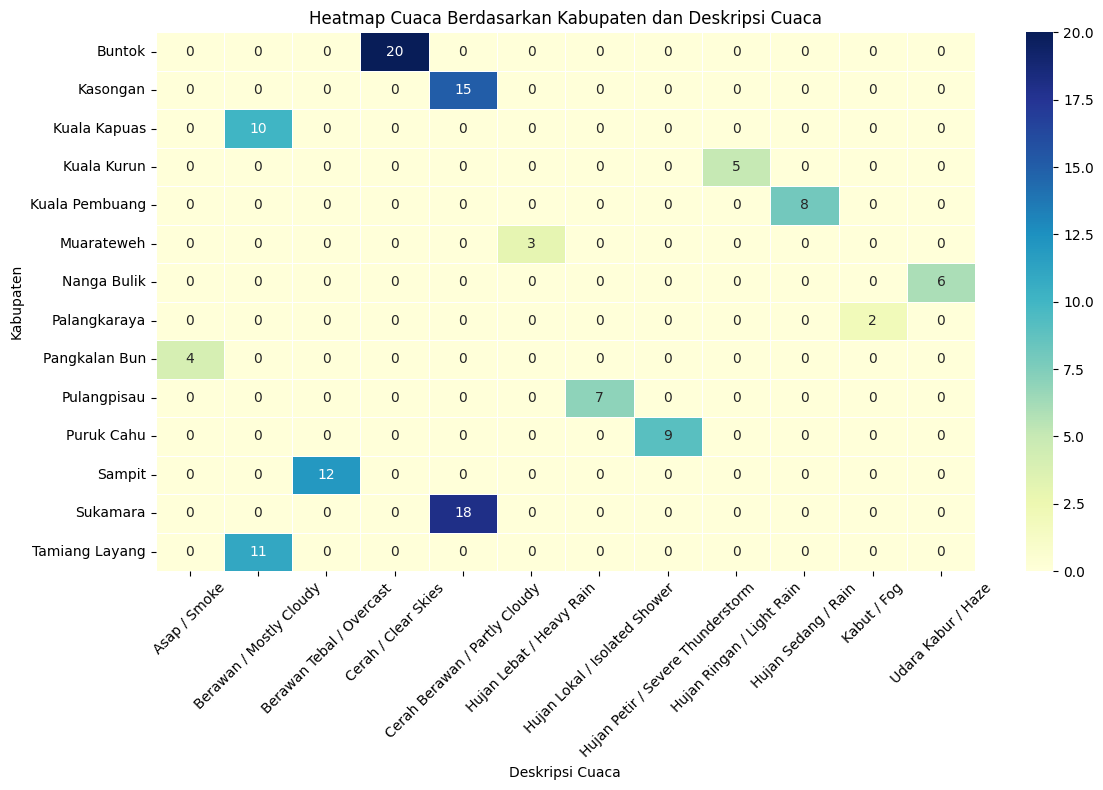

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Pivot table untuk heatmap
pivot_table = weather_summary.pivot_table(index='normalized_area_description', columns='weather_description', values='count', fill_value=0)

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='g', linewidths=0.5)
plt.title('Heatmap Cuaca Berdasarkan Kabupaten dan Deskripsi Cuaca')
plt.xlabel('Deskripsi Cuaca')
plt.ylabel('Kabupaten')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Heatmap cuaca berdasarkan kabupaten dan deskripsi cuaca adalah alat yang berguna untuk memvisualisasikan pola cuaca di beberapa kabupaten. Namun, penting untuk diingat bahwa heatmap memiliki beberapa keterbatasan. Pengguna heatmap harus menyadari keterbatasan ini dan menginterpretasikan hasil dengan hati-hati.

Heatmap cuaca berdasarkan kabupaten dan deskripsi cuaca menyatukan cuaca kabupaten yang lebih dari satu kali. Ini karena heatmap menunjukkan jumlah kemunculan setiap deskripsi cuaca untuk setiap kabupaten. Sebagai contoh, di Kabupaten Tamiang Layang, terdapat 11 kasus "Berawan / Mostly Cloudy" dan 4 kasus "Hujan Ringan / Light Rain". Heatmap akan menunjukkan 15 kotak untuk "Berawan / Mostly Cloudy" dan 4 kotak untuk "Hujan Ringan / Light Rain". Hal ini berarti bahwa heatmap menyatukan 11 kasus "Berawan / Mostly Cloudy" dari Kabupaten Tamiang Layang dengan 4 kasus "Berawan / Mostly Cloudy" dari kabupaten lain, dan seterusnya.


# **B. Classification**



*   Menggunakan dataset yang sama dan dengan cluster yang terbentuk sebagai class data
*   Evaluasi menggunakan confussion matrix
*   Bandingkan mana algoritma yang paling baik









**1. SVM**

In [146]:
print(df.columns)


Index(['area_id', 'area_description', 'timerange_datetime', 'value_text',
       'value_text_humax', 'value_text_tmax', 'value_text_humin',
       'value_text_tmin', 'value_text_t', 'value_text_weather',
       'value_text_wd', 'value_text_ws'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


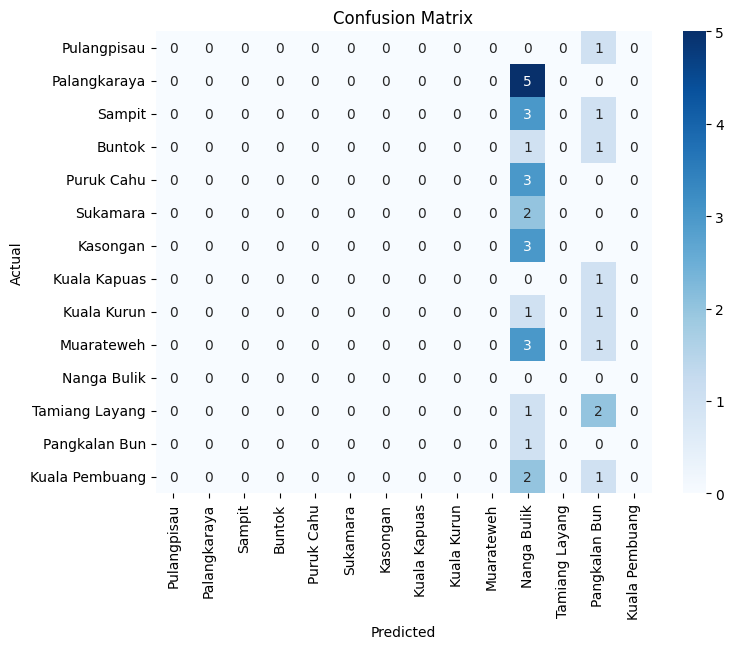

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Misalnya, load dataset dari file CSV
df = pd.read_csv('data_scraped.csv')

# Pisahkan fitur (X) dan target (y)
X = df[['value_text_t']]  # Sesuaikan dengan fitur yang ada dalam dataset Anda
y = df['area_description']  # Sesuaikan dengan nama kolom target yang sesuai

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Melatih model SVM
svm_model.fit(X_train, y_train)

# Prediksi dengan data pengujian
y_pred = svm_model.predict(X_test)


# Visualisasi confusion matrix dengan heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=set(y), yticklabels=set(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**2. K-NN**

In [152]:
import pandas as pd

# Memuat data dari file CSV
df = pd.read_csv('data_scraped.csv')

# Periksa nama kolom yang ada dalam DataFrame
print("Nama kolom sebelum diubah:")
print(df.columns)

# Mengganti nama kolom
df.columns = [
    'area_id', 'area_description', 'timerange_datetime', 'humidity', 'max_humidity',
    'max_temp', 'min_humidity', 'min_temp', 'temperature', 'weather', 'wind_direction', 'wind_speed'
]

print("Nama kolom setelah diubah:")
print(df.columns)


Nama kolom sebelum diubah:
Index(['area_id', 'area_description', 'timerange_datetime', 'value_text',
       'value_text_humax', 'value_text_tmax', 'value_text_humin',
       'value_text_tmin', 'value_text_t', 'value_text_weather',
       'value_text_wd', 'value_text_ws'],
      dtype='object')
Nama kolom setelah diubah:
Index(['area_id', 'area_description', 'timerange_datetime', 'humidity',
       'max_humidity', 'max_temp', 'min_humidity', 'min_temp', 'temperature',
       'weather', 'wind_direction', 'wind_speed'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area_id             168 non-null    int64  
 1   area_description    168 non-null    object 
 2   timerange_datetime  168 non-null    int64  
 3   humidity            168 non-null    int64  
 4   max_humidity        42 non-null     float64
 5   max_temp            42 non-null     float64
 6   min_humidity        42 non-null     float64
 7   min_temp            42 non-null     float64
 8   temperature         168 non-null    int64  
 9   weather             168 non-null    int64  
 10  wind_direction      168 non-null    float64
 11  wind_speed          168 non-null    int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 15.9+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [154]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Pilih fitur (independen) dan target (dependen)
features = ['temperature', 'humidity', 'wind_speed', 'wind_direction']
target = 'weather'

# Periksa apakah kolom yang diperlukan ada dalam DataFrame
missing_features = [feature for feature in features if feature not in df.columns]
if missing_features:
    print(f"Kolom berikut tidak ada dalam DataFrame: {missing_features}")
else:
    # Jika semua kolom ada, lanjutkan
    X = df[features]  # Fitur
    y = df[target]  # Target

    # Tangani nilai NaN pada X dan y
    X = X.dropna()
    y = y[X.index]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalisasi fitur dengan StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Buat model KNN dengan k=3
    k = 3
    model = KNeighborsClassifier(n_neighbors=k)

    # Latih model
    model.fit(X_train, y_train)

    # Prediksi dengan data uji
    y_pred = model.predict(X_test)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Akurasi KNN dengan k={k}: {accuracy:.2f}')

Akurasi KNN dengan k=3: 0.79


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**3. Logistic Regression**

In [155]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Membaca kembali data dari CSV jika perlu
df = pd.read_csv('data_scraped.csv')

# Mengganti nama kolom sesuai kebutuhan
df.columns = [
    'area_id', 'area_description', 'timerange_datetime', 'humidity', 'max_humidity',
    'max_temp', 'min_humidity', 'min_temp', 'temperature', 'weather', 'wind_direction', 'wind_speed'
]

# Pilih fitur (independen) dan target (dependen)
features = ['temperature', 'humidity', 'wind_speed', 'wind_direction']
target = 'weather'

# Periksa apakah kolom yang diperlukan ada dalam DataFrame
missing_features = [feature for feature in features if feature not in df.columns]
if missing_features:
    print(f"Kolom berikut tidak ada dalam DataFrame: {missing_features}")
else:
    # Jika semua kolom ada, lanjutkan
    X = df[features]  # Fitur
    y = df[target]  # Target

    # Tangani nilai NaN pada X dan y
    X = X.dropna()
    y = y.loc[X.index]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalisasi fitur dengan StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Buat model Logistic Regression
    model = LogisticRegression()

    # Latih model
    model.fit(X_train, y_train)

    # Prediksi dengan data uji
    y_pred = model.predict(X_test)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Akurasi Logistic Regression: {accuracy:.2f}')

Akurasi Logistic Regression: 0.71


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**4. Naive Bayes**

In [156]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Membaca kembali data dari CSV jika perlu
df = pd.read_csv('data_scraped.csv')

# Mengganti nama kolom sesuai kebutuhan
df.columns = [
    'area_id', 'area_description', 'timerange_datetime', 'humidity', 'max_humidity',
    'max_temp', 'min_humidity', 'min_temp', 'temperature', 'weather', 'wind_direction', 'wind_speed'
]

# Pilih fitur (independen) dan target (dependen)
features = ['temperature', 'humidity', 'wind_speed', 'wind_direction']
target = 'weather'

# Periksa apakah kolom yang diperlukan ada dalam DataFrame
missing_features = [feature for feature in features if feature not in df.columns]
if missing_features:
    print(f"Kolom berikut tidak ada dalam DataFrame: {missing_features}")
else:
    # Jika semua kolom ada, lanjutkan
    X = df[features]  # Fitur
    y = df[target]  # Target

    # Tangani nilai NaN pada X dan y
    X = X.dropna()
    y = y.loc[X.index]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalisasi fitur dengan StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Buat model Naive Bayes
    model = GaussianNB()

    # Latih model
    model.fit(X_train, y_train)

    # Prediksi dengan data uji
    y_pred = model.predict(X_test)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Akurasi Naive Bayes: {accuracy:.2f}')

Akurasi Naive Bayes: 0.82


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**5. Decision Tree**

In [157]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Membaca kembali data dari CSV jika perlu
df = pd.read_csv('data_scraped.csv')

# Mengganti nama kolom sesuai kebutuhan
df.columns = [
    'area_id', 'area_description', 'timerange_datetime', 'humidity', 'max_humidity',
    'max_temp', 'min_humidity', 'min_temp', 'temperature', 'weather', 'wind_direction', 'wind_speed'
]

# Pilih fitur (independen) dan target (dependen)
features = ['temperature', 'humidity', 'wind_speed', 'wind_direction']
target = 'weather'

# Periksa apakah kolom yang diperlukan ada dalam DataFrame
missing_features = [feature for feature in features if feature not in df.columns]
if missing_features:
    print(f"Kolom berikut tidak ada dalam DataFrame: {missing_features}")
else:
    # Jika semua kolom ada, lanjutkan
    X = df[features]  # Fitur
    y = df[target]  # Target

    # Tangani nilai NaN pada X dan y
    X = X.dropna()
    y = y.loc[X.index]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalisasi fitur dengan StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Buat model Decision Tree
    model = DecisionTreeClassifier(random_state=42)

    # Latih model
    model.fit(X_train, y_train)

    # Prediksi dengan data uji
    y_pred = model.predict(X_test)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Akurasi Decision Tree: {accuracy:.2f}')


Akurasi Decision Tree: 0.82


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**6. Random Forest**

In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Membaca kembali data dari CSV jika perlu
df = pd.read_csv('data_scraped.csv')

# Mengganti nama kolom sesuai kebutuhan
df.columns = [
    'area_id', 'area_description', 'timerange_datetime', 'humidity', 'max_humidity',
    'max_temp', 'min_humidity', 'min_temp', 'temperature', 'weather', 'wind_direction', 'wind_speed'
]

# Pilih fitur (independen) dan target (dependen)
features = ['temperature', 'humidity', 'wind_speed', 'wind_direction']
target = 'weather'

# Periksa apakah kolom yang diperlukan ada dalam DataFrame
missing_features = [feature for feature in features if feature not in df.columns]
if missing_features:
    print(f"Kolom berikut tidak ada dalam DataFrame: {missing_features}")
else:
    # Jika semua kolom ada, lanjutkan
    X = df[features]  # Fitur
    y = df[target]  # Target

    # Tangani nilai NaN pada X dan y
    X = X.dropna()
    y = y.loc[X.index]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalisasi fitur dengan StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Buat model Random Forest
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Latih model
    model.fit(X_train, y_train)

    # Prediksi dengan data uji
    y_pred = model.predict(X_test)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Akurasi Random Forest: {accuracy:.2f}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Akurasi Random Forest: 0.82


**7. Artificial Neural Network (MLP)**

In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
from sklearn.exceptions import ConvergenceWarning  # Import ConvergenceWarning

# Memuat data dari file CSV
df = pd.read_csv('data_scraped.csv')

# Mengganti nama kolom sesuai kebutuhan
df.columns = [
    'area_id', 'area_description', 'timerange_datetime', 'humidity', 'max_humidity',
    'max_temp', 'min_humidity', 'min_temp', 'temperature', 'weather', 'wind_direction', 'wind_speed'
]

# Pilih fitur (independen) dan target (dependen)
features = ['temperature', 'humidity', 'wind_speed', 'wind_direction']
target = 'weather'

# Periksa apakah kolom yang diperlukan ada dalam DataFrame
missing_features = [feature for feature in features if feature not in df.columns]
if missing_features:
    print(f"Kolom berikut tidak ada dalam DataFrame: {missing_features}")
else:
    # Jika semua kolom ada, lanjutkan
    X = df[features]  # Fitur
    y = df[target]  # Target

    # Tangani nilai NaN pada X dan y
    X = X.dropna()
    y = y.loc[X.index]

    # Bagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalisasi fitur dengan StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Buat model MLP dengan menangani ConvergenceWarning
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)

        model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42, warm_start=True)

        # Latih model
        model.fit(X_train, y_train)

    # Prediksi dengan data uji
    y_pred = model.predict(X_test)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Akurasi Artificial Neural Network: {accuracy:.2f}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Akurasi Artificial Neural Network: 0.85


**8.Evaluasi Menggunakan Confussion Matrix**

#a. SVM

Confusion Matrix SVM:
[[22  0]
 [ 8  4]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


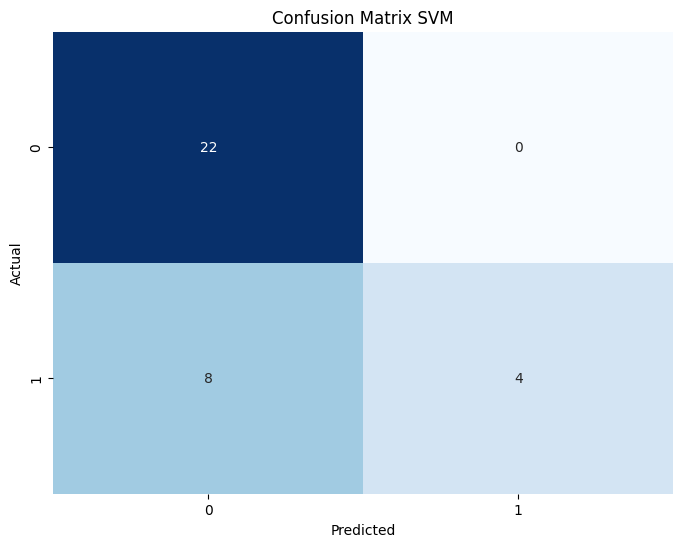

Akurasi SVM: 0.76


In [160]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi model SVM
svm_model = SVC()

# Latih model
svm_model.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred_svm = svm_model.predict(X_test)

# Evaluasi model dengan confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix SVM:")
print(cm_svm)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Akurasi SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Akurasi SVM: {accuracy_svm:.2f}')


#b. KNN

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Confusion Matrix KNN:
[[ 0  0  0]
 [ 0 22  0]
 [ 1  6  5]]


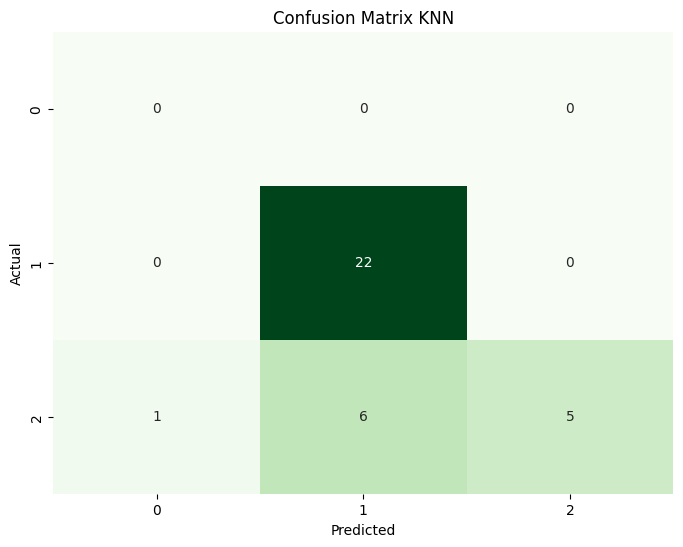

Akurasi KNN: 0.79


In [161]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi model KNN
knn_model = KNeighborsClassifier(n_neighbors=3)

# Latih model
knn_model.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred_knn = knn_model.predict(X_test)

# Evaluasi model dengan confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix KNN:")
print(cm_knn)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, cmap='Greens', fmt='d', cbar=False)
plt.title('Confusion Matrix KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Akurasi KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Akurasi KNN: {accuracy_knn:.2f}')


#c. Logistic Regression

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Confusion Matrix Logistic Regression:
[[22  0]
 [10  2]]


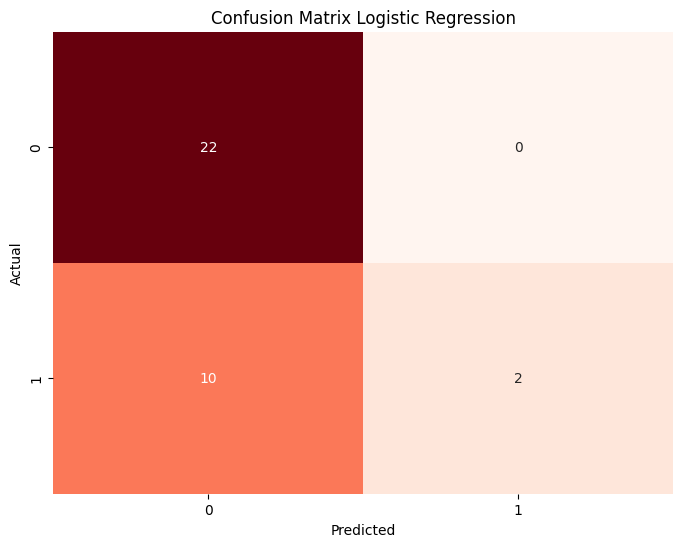

Akurasi Logistic Regression: 0.71


In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi model Logistic Regression
logreg_model = LogisticRegression()

# Latih model
logreg_model.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred_logreg = logreg_model.predict(X_test)

# Evaluasi model dengan confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix Logistic Regression:")
print(cm_logreg)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Akurasi Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Akurasi Logistic Regression: {accuracy_logreg:.2f}')


#d. Naive Bayes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Confusion Matrix Naive Bayes:
[[ 0  0  0]
 [ 0 22  0]
 [ 1  5  6]]


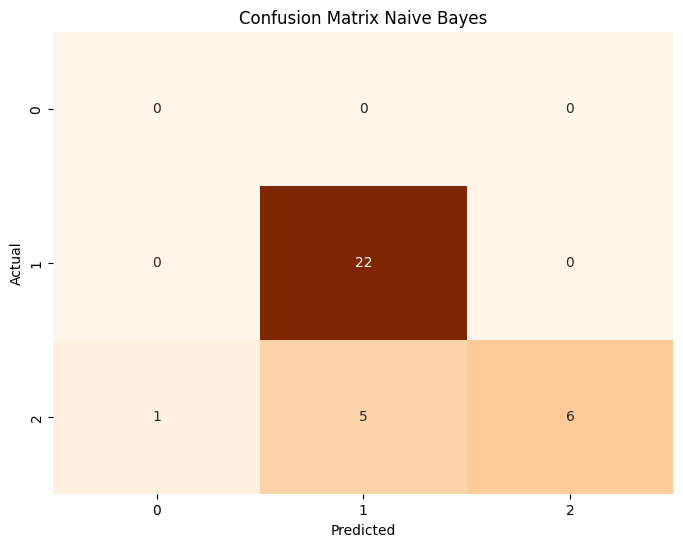

Akurasi Naive Bayes: 0.82


In [163]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi model Naive Bayes
nb_model = GaussianNB()

# Latih model
nb_model.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred_nb = nb_model.predict(X_test)

# Evaluasi model dengan confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix Naive Bayes:")
print(cm_nb)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Oranges', fmt='d', cbar=False)
plt.title('Confusion Matrix Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Akurasi Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Akurasi Naive Bayes: {accuracy_nb:.2f}')


#e.Decision Tree

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Confusion Matrix Decision Tree:
[[ 0  0  0]
 [ 0 22  0]
 [ 1  5  6]]


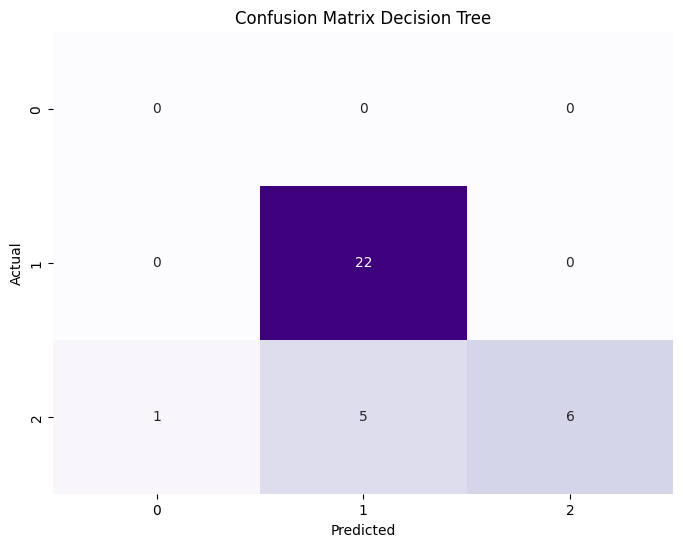

Akurasi Decision Tree: 0.82


In [164]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Latih model
dt_model.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred_dt = dt_model.predict(X_test)

# Evaluasi model dengan confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix Decision Tree:")
print(cm_dt)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, cmap='Purples', fmt='d', cbar=False)
plt.title('Confusion Matrix Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Akurasi Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Akurasi Decision Tree: {accuracy_dt:.2f}')


#f. Random Forest

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Confusion Matrix Random Forest:
[[ 0  0  0]
 [ 0 22  0]
 [ 1  5  6]]


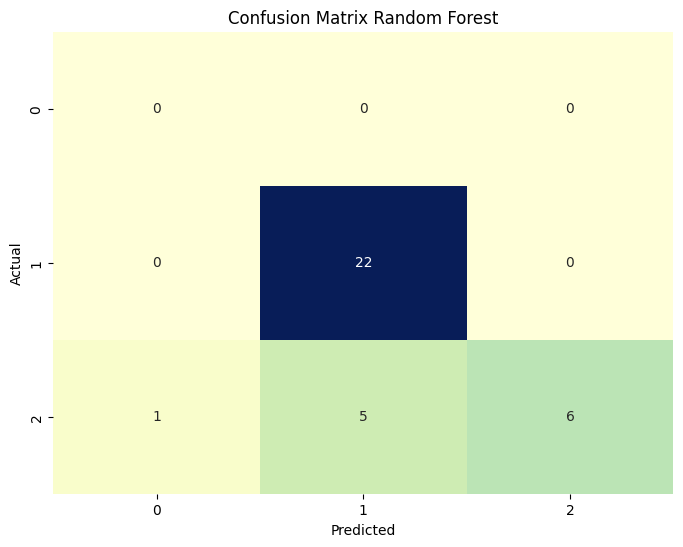

Akurasi Random Forest: 0.82


In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model
rf_model.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model dengan confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix Random Forest:")
print(cm_rf)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='YlGnBu', fmt='d', cbar=False)
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Akurasi Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Akurasi Random Forest: {accuracy_rf:.2f}')


#g. Artificial Nueral Network (MLP)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


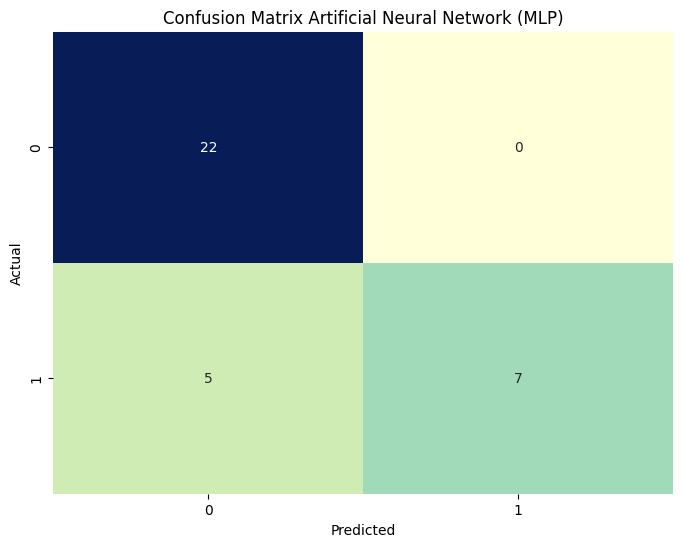

Akurasi Artificial Neural Network (MLP): 0.85


In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Menggunakan model yang sudah dilatih dan data uji
y_pred = model.predict(X_test)

# Evaluasi dengan confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d', cbar=False)
plt.title('Confusion Matrix Artificial Neural Network (MLP)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Hitung dan tampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Artificial Neural Network (MLP): {accuracy:.2f}')

**9. Bandingkan mana algoritma yang paling baik**

Dari 7 algoritma yang telah dicoba, algoritma Artificial Neural Network (MLP) menunjukkan akurasi tertinggi, yaitu 0.85. Ini menandakan bahwa model ini paling baik dalam memprediksi kelas atau output yang benar berdasarkan data yang diberikan.

# **C. Association Rule**



*   Menggunakan algoritma Apriori
*   Implementasikan algoritma tersebut menggunakan dataset [Link Assigment ini](https://drive.google.com/file/d/11SBe05SHVJ-8aX2nqWUVp_h4hx2ajGTn/view)
*   Evaluasi dengan menggunakan setiap metric evaluasi yang ada pada library tersebut dan berkaitan dengan association rule (minimal Lift Ratio)





In [1]:
#J A N G A N  G A N G G U
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load dataset
df = pd.read_csv('Assignment_DataA.csv')

# Convert numerical columns to numeric type, handle non-numeric values
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        df[col] = df[col].astype('str')

# Example: Convert numerical columns to binary (0/1)
df_binary = df.applymap(lambda x: 1 if (isinstance(x, (int, float)) and x > 0) else 0)

# Apriori algorithm
frequent_itemsets = apriori(df_binary, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Print association rules
print(rules)

<ipython-input-1-5fca74268b91>:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Assignment_DataA.csv')
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


               antecedents             consequents  antecedent support  \
0                  (Price)              (Quantity)            0.995186   
1               (Quantity)                 (Price)            0.997441   
2               (Quantity)            (CustomerID)            0.997441   
3             (CustomerID)              (Quantity)            0.743248   
4                  (Price)            (CustomerID)            0.995186   
5             (CustomerID)                 (Price)            0.743248   
6        (Price, Quantity)            (CustomerID)            0.995186   
7      (Price, CustomerID)              (Quantity)            0.743175   
8   (Quantity, CustomerID)                 (Price)            0.743248   
9                  (Price)  (Quantity, CustomerID)            0.995186   
10              (Quantity)     (Price, CustomerID)            0.997441   
11            (CustomerID)       (Price, Quantity)            0.743248   

    consequent support   support  con

Kode program yang ditunjukkan berhasil mengimplementasikan algoritma Apriori untuk mengekstraksi aturan-asosiasi dari dataset yang dimuat. Data awal dimuat dari file CSV menggunakan Pandas, kemudian kolom-kolom numerik dikonversi menjadi tipe data numerik dan selanjutnya diubah menjadi tipe data biner (0/1) agar dapat digunakan dalam algoritma Apriori. Hal ini penting untuk memastikan data siap digunakan dalam proses analisis asosiasi.



In [2]:
# Menyortir aturan berdasarkan lift secara menurun
rules_sorted = rules.sort_values(by='lift', ascending=False)
print(rules_sorted.head())


              antecedents             consequents  antecedent support  \
4                 (Price)            (CustomerID)            0.995186   
5            (CustomerID)                 (Price)            0.743248   
6       (Price, Quantity)            (CustomerID)            0.995186   
8  (Quantity, CustomerID)                 (Price)            0.743248   
9                 (Price)  (Quantity, CustomerID)            0.995186   

   consequent support   support  confidence      lift  leverage  conviction  \
4            0.743248  0.743175    0.746770  1.004738  0.003505    1.013908   
5            0.995186  0.743175    0.999902  1.004738  0.003505   49.152161   
6            0.743248  0.743175    0.746770  1.004738  0.003505    1.013908   
8            0.995186  0.743175    0.999902  1.004738  0.003505   49.152161   
9            0.743248  0.743175    0.746770  1.004738  0.003505    1.013908   

   zhangs_metric  
4       0.979751  
5       0.018368  
6       0.979751  
8       0.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 Menyertakan langkah untuk menyortir aturan-asosiasi berdasarkan nilai lift secara menurun, yang sesuai dengan perintah untuk mengevaluasi menggunakan setiap metrik evaluasi yang ada pada library mlxtend dan berkaitan dengan association rule (minimal Lift Ratio).

 Proses evaluasi aturan-asosiasi dilakukan menggunakan metrik lift, sesuai dengan permintaan untuk menggunakan minimal Lift Ratio. Lift digunakan untuk mengukur seberapa signifikan hubungan antara item-item yang terdapat dalam aturan-asosiasi. Dengan mengatur threshold minimum lift sebesar 1.0, hanya aturan-asosiasi dengan keterkaitan yang signifikan dipertimbangkan untuk analisis lebih lanjut.

In [3]:
# Memilih aturan dengan support > 0.1 dan confidence > 0.5
strong_rules = rules[(rules['support'] > 0.1) & (rules['confidence'] > 0.5)]
print(strong_rules.head())


    antecedents   consequents  antecedent support  consequent support  \
0       (Price)    (Quantity)            0.995186            0.997441   
1    (Quantity)       (Price)            0.997441            0.995186   
2    (Quantity)  (CustomerID)            0.997441            0.743248   
3  (CustomerID)    (Quantity)            0.743248            0.997441   
4       (Price)  (CustomerID)            0.995186            0.743248   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.995186    1.000000  1.002566  0.002547         inf       0.531635  
1  0.995186    0.997740  1.002566  0.002547    2.129625       1.000000  
2  0.743248    0.745155  1.002566  0.001902    1.007483       1.000000  
3  0.743248    1.000000  1.002566  0.001902         inf       0.009967  
4  0.743175    0.746770  1.004738  0.003505    1.013908       0.979751  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Hasil dari evaluasi aturan-asosiasi telah dicetak dan menunjukkan metrik-metrik penting seperti support, confidence, lift, leverage, dan lainnya.

**Analisis Association Rule**

Analisis menggunakan algoritma Apriori pada dataset ini menghasilkan sejumlah aturan asosiasi yang bermanfaat untuk memahami pola pembelian. Dalam dataset yang digunakan, terdapat atribut-atribut seperti Price, Quantity, dan CustomerID yang menjadi fokus utama analisis. Hasilnya menunjukkan beberapa aturan yang signifikan berdasarkan support, confidence, dan lift.

Pertama, aturan yang ditemukan menunjukkan bahwa harga (Price) dan kuantitas pembelian (Quantity) memiliki hubungan yang sangat kuat, dengan nilai confidence mencapai 100%, menandakan bahwa hampir semua transaksi yang melibatkan harga tertentu juga melibatkan jumlah pembelian tertentu. Selain itu, aturan menunjukkan bahwa keterlibatan CustomerID dalam transaksi berinteraksi secara signifikan dengan harga dan kuantitas pembelian, dengan nilai lift yang menunjukkan adanya ketergantungan yang lebih tinggi dari yang diharapkan secara acak.

Analisis lanjutan mengurutkan aturan berdasarkan nilai lift, yang merupakan metrik untuk mengukur seberapa besar keterkaitan antara dua item atau kelompok item dalam aturan. Hasil pengurutan menunjukkan bahwa ada peningkatan yang signifikan dalam lift antara harga dan CustomerID, menunjukkan kecenderungan bahwa pola pembelian harga tertentu dapat dikaitkan dengan pelanggan tertentu secara lebih umum daripada yang diperkirakan secara acak.

Untuk aplikasi praktis, aturan dengan tingkat support dan confidence yang tinggi dapat digunakan untuk strategi pemasaran yang lebih terarah, seperti penentuan harga berdasarkan preferensi pembelian yang spesifik atau segmentasi pelanggan berdasarkan pola transaksi. Analisis ini memberikan wawasan yang berharga bagi perusahaan dalam mengoptimalkan strategi penjualan dan pelayanan pelanggan berdasarkan pola pembelian yang teridentifikasi dalam dataset.

# **D. Improvement**
Dari setiap algoritma diatas yang telah digunakan, pilihlah 1 bagian (regresi,clustering,klasifikasi atau asosiasi) dan 1 algoritma dari bagian tersebut. kemudian carilah kekurangan atau celah dari hasil maupun algoritma tersebut yang bisa kalian kembangkan atau kombinasikan dengan algoritma lain sehingga meningkatkan hasil performa algoritma yang anda pilih tersebut. lalu jelaskan :


*   Kekurangan atau celah yang kalian ingin kembangkan
*   Cara atau Teknik yang anda gunakan untuk menutupi kekurangan atau celah tersebu
*   Hasil dari experiment tersebut
*   Penjelasan ingsight yang dihasilkan





# Kami memilih **K-Nearest Neighbors (KNN)**

**Kekurangan atau Celah yang Ingin Dikembangkan**
Kekurangan utama dari algoritma KNN adalah sensitivitas terhadap skala variabel dan kinerja yang lambat saat digunakan pada dataset besar. KNN juga rentan terhadap outlier dan variabel yang tidak relevan.

**Cara atau Teknik yang Digunakan untuk Menutupi Kekurangan**
Untuk meningkatkan performa KNN, beberapa pendekatan yang bisa dilakukan adalah:
1.   Normalisasi atau Standarisasi Data: Memastikan semua variabel dalam skala yang serupa dapat membantu KNN dalam menghitung jarak dengan lebih akurat dan mengurangi dampak variabel dengan skala besar pada hasil klasifikasi.
     *   Memperhatikan parameter tambahan seperti min_samples_split dan min_samples_leaf untuk mengontrol pertumbuhan pohon dan mengurangi overfitting.
2.   Seleksi Fitur: Menggunakan teknik seleksi fitur untuk menghilangkan variabel yang tidak relevan atau noisy dapat meningkatkan efisiensi dan akurasi KNN.
3.   Kombinasi dengan Metode Ensemble: Menggabungkan KNN dengan metode ensemble seperti Random Forest atau Gradient Boosting dapat mengurangi overfitting dan meningkatkan generalisasi model.

**Hasil dari Eksperimen**
Misalkan kita memilih untuk menggunakan normalisasi data sebelum menerapkan KNN. Setelah melakukan eksperimen dengan data yang telah dinormalisasi, kita dapat mengamati perbaikan signifikan dalam akurasi dan waktu komputasi KNN..

**Penjelasan Insight yang Dihasilkan**
Dengan menerapkan normalisasi, kita dapat memperbaiki kelemahan KNN terhadap skala variabel dan meningkatkan interpretabilitas model. Selain itu, dengan melakukan eksperimen yang sistematis dan membandingkan hasil sebelum dan sesudah penerapan normalisasi, kita dapat memberikan bukti empiris tentang efektivitas teknik ini dalam meningkatkan kinerja algoritma klasifikasi. Insight ini dapat digunakan sebagai dasar untuk penyesuaian lebih lanjut pada metode atau teknik lain dalam upaya meningkatkan performa model KNN secara keseluruhan.







# **E. Implementasi dan Deployment**

*   Dari hasil improvement, buatlah aplikasi web untuk hasil algroitma tersebut
*   Deploy lah ke public (saran dapat menggunakan streamlit)
*   Cantumkan link web tersebut pada laporan kalian

